In [1]:
## Student DataFest 2K18

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
## Reading the data
train = pd.read_csv("/content/Competitions/Analytics_Vidhya/Student_DataFest_2k18/src/Data/train.csv")

In [5]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [6]:
## Let's get some dataset info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         73147 non-null  object 
 1   program_id                 73147 non-null  object 
 2   program_type               73147 non-null  object 
 3   program_duration           73147 non-null  int64  
 4   test_id                    73147 non-null  int64  
 5   test_type                  73147 non-null  object 
 6   difficulty_level           73147 non-null  object 
 7   trainee_id                 73147 non-null  int64  
 8   gender                     73147 non-null  object 
 9   education                  73147 non-null  object 
 10  city_tier                  73147 non-null  int64  
 11  age                        45418 non-null  float64
 12  total_programs_enrolled    73147 non-null  int64  
 13  is_handicapped             73147 non-null  obj

In [10]:
test = pd.read_csv('/content/Competitions/Analytics_Vidhya/Student_DataFest_2k18/src/Data/test.csv')

In [11]:
import eda_utils as utils

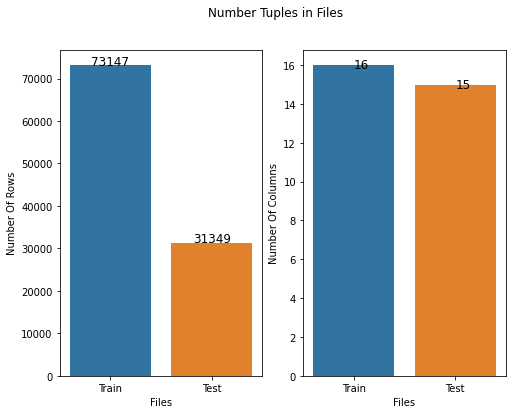

In [12]:
utils.plot_num_records({'Train': train, 'Test': test})

In [13]:
## From above graph it is clear that there is just 1 Target Variable.

In [14]:
### Lets check if the type of variables...
for col in train.columns:
    print(col, train[col].nunique())

id 73147
program_id 22
program_type 7
program_duration 10
test_id 188
test_type 2
difficulty_level 4
trainee_id 18500
gender 2
education 5
city_tier 4
age 45
total_programs_enrolled 13
is_handicapped 2
trainee_engagement_rating 5
is_pass 2


In [15]:
''' From above it is clear that,
id : useless
program_id : category => need to check its distribution then select ohe or label enc
program type : category
program_duration : numerical
test_id : Numerical ## Can see test id histogram
test_type : binary
difficulty_level : ordinal
trainee_id : Numerical ## Histogram
gender : binary
education : ordinal
city_tier : Numerical ## No change
age : Numerical ## Histogram
total_prog_enrolled : Numerical
is_pass : Binary
'''

' From above it is clear that,\nid : useless\nprogram_id : category => need to check its distribution then select ohe or label enc\nprogram type : category\nprogram_duration : numerical\ntest_id : Numerical ## Can see test id histogram\ntest_type : binary\ndifficulty_level : ordinal\ntrainee_id : Numerical ## Histogram\ngender : binary\neducation : ordinal\ncity_tier : Numerical ## No change\nage : Numerical ## Histogram\ntotal_prog_enrolled : Numerical\nis_pass : Binary\n'

In [16]:
train.head()
## here id is object only and not integer unlike other cases.

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [17]:
train.dtypes=='object'

id                            True
program_id                    True
program_type                  True
program_duration             False
test_id                      False
test_type                     True
difficulty_level              True
trainee_id                   False
gender                        True
education                     True
city_tier                    False
age                          False
total_programs_enrolled      False
is_handicapped                True
trainee_engagement_rating    False
is_pass                      False
dtype: bool

In [18]:
### All the datasets have same object types for their respective columns

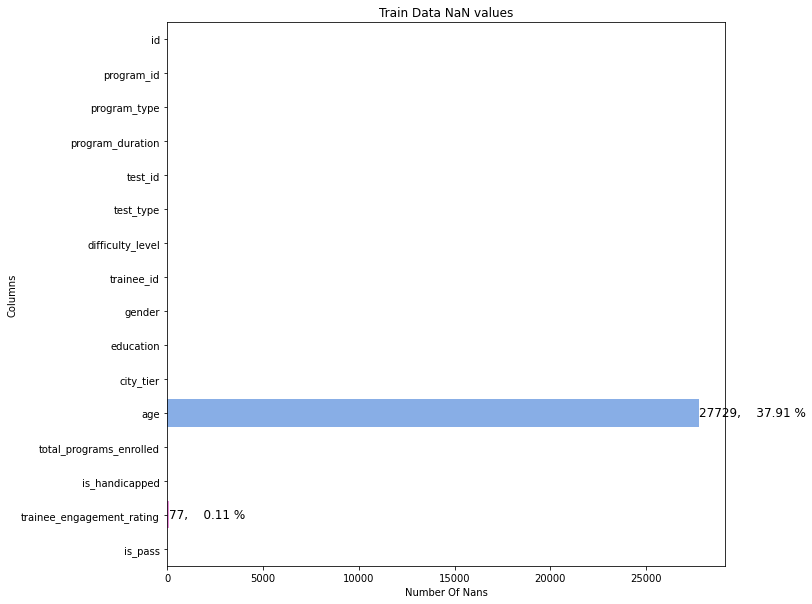

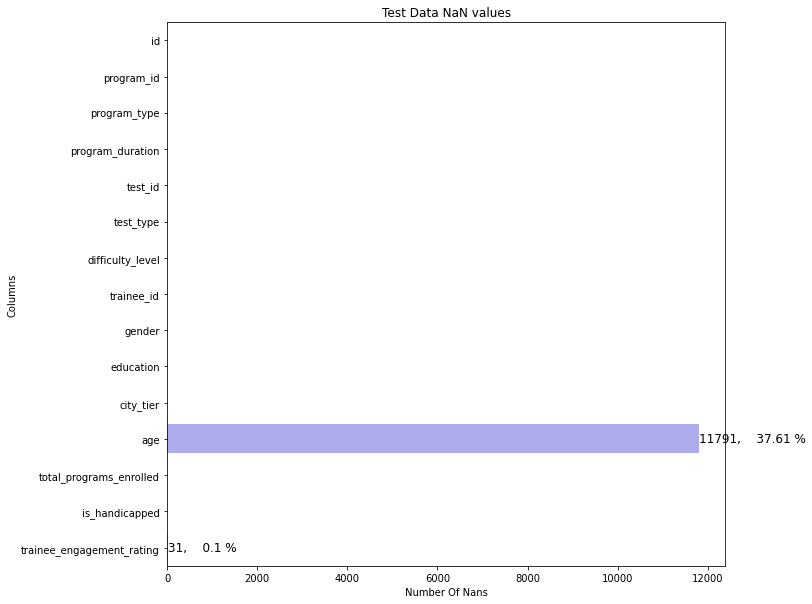

In [19]:
###### Missing Values
utils.plot_nan(train, "Train Data NaN values")
utils.plot_nan(test, "Test Data NaN values")

In [20]:
### Missing values here are in both test and train and in same column of age.

In [21]:
utils.data_check(train, test)


Datatype : object
73147 unique id in Train dataset
31349 unique id in Test dataset
31349 extra id in Test dataset

31349 id are not present in Train dataset which are in Test dataset

Datatype : int64
10 unique program_duration in Train dataset
10 unique program_duration in Test dataset
0 extra program_duration in Test dataset

All values present in Test dataset also present in Train dataset for column program_duration

Datatype : object
2 unique is_handicapped in Train dataset
2 unique is_handicapped in Test dataset
0 extra is_handicapped in Test dataset

All values present in Test dataset also present in Train dataset for column is_handicapped

Datatype : int64
4 unique city_tier in Train dataset
4 unique city_tier in Test dataset
0 extra city_tier in Test dataset

All values present in Test dataset also present in Train dataset for column city_tier

Datatype : int64
188 unique test_id in Train dataset
188 unique test_id in Test dataset
0 extra test_id in Test dataset

All values pr

In [22]:
### Clearly test set has unseen id values so we can simply remove the id columns from train dataset
train = train.drop(['id'], axis=1)

In [23]:
train.head()

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


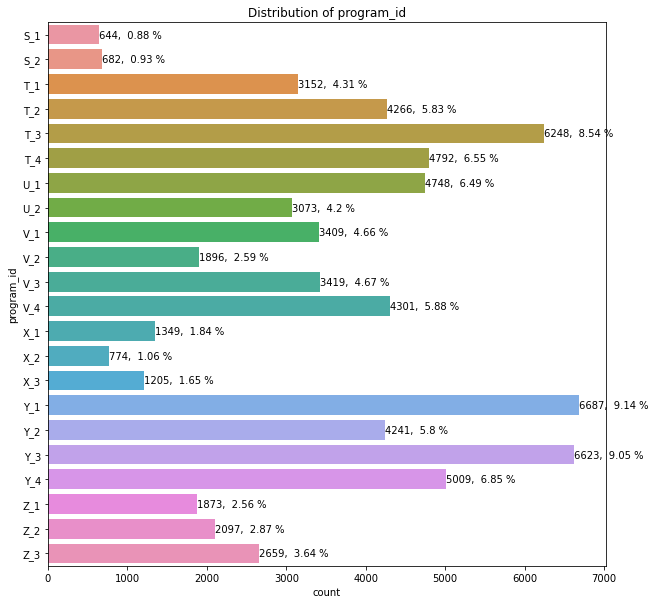

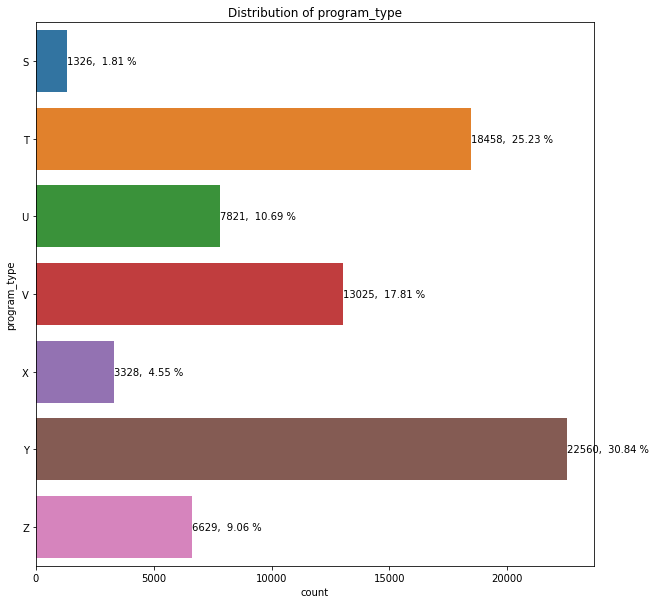

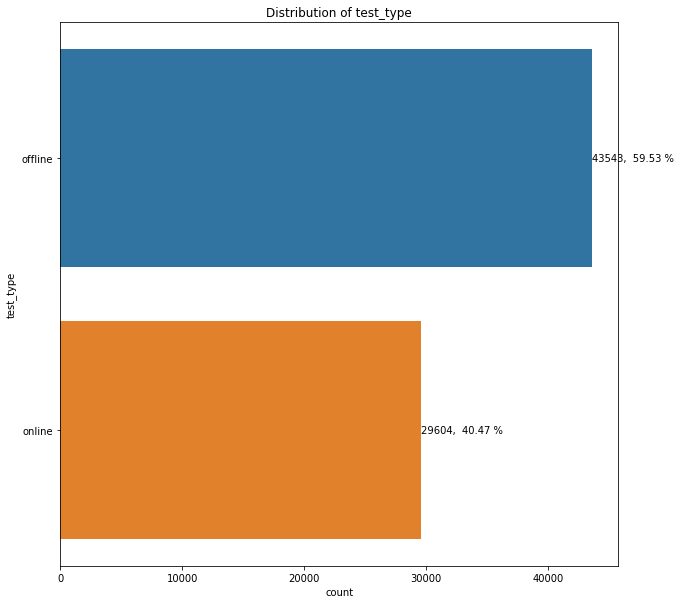

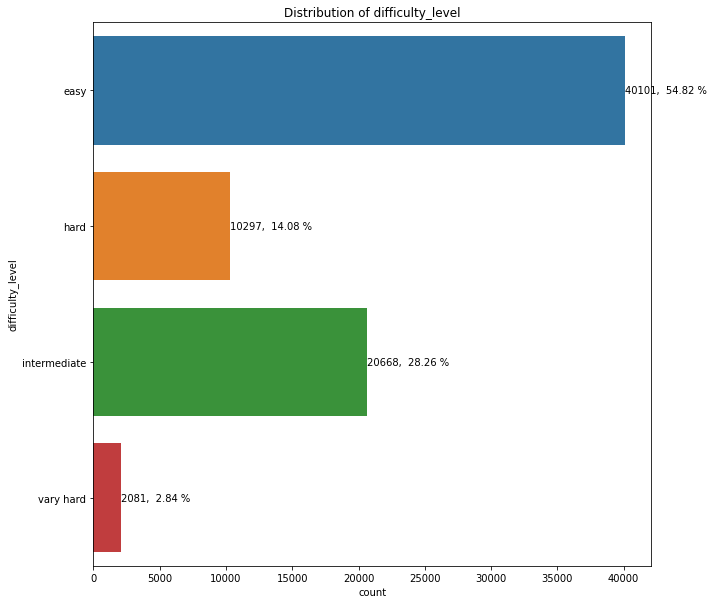

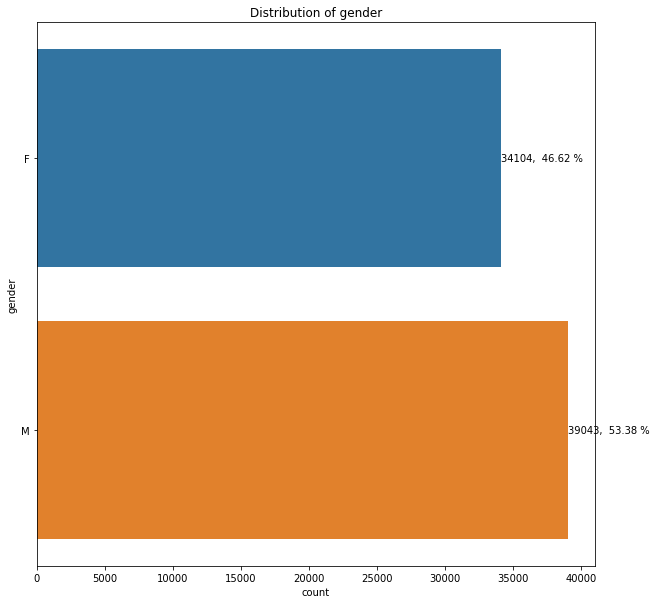

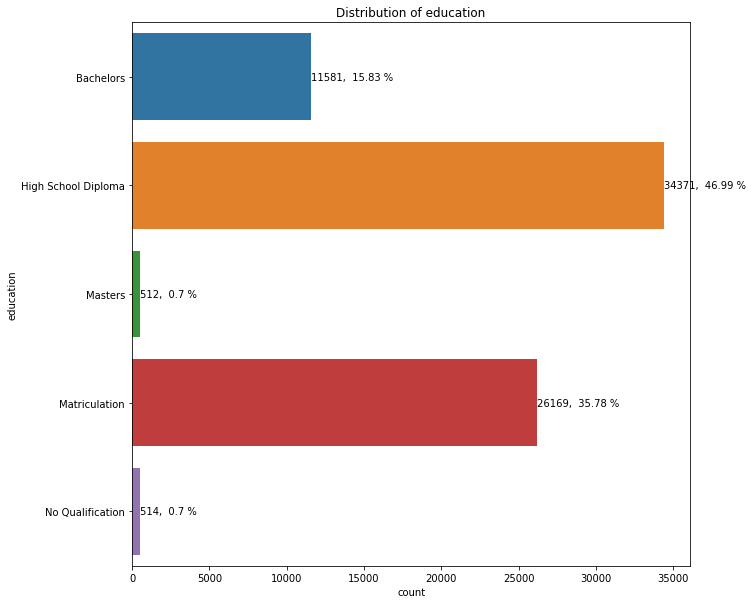

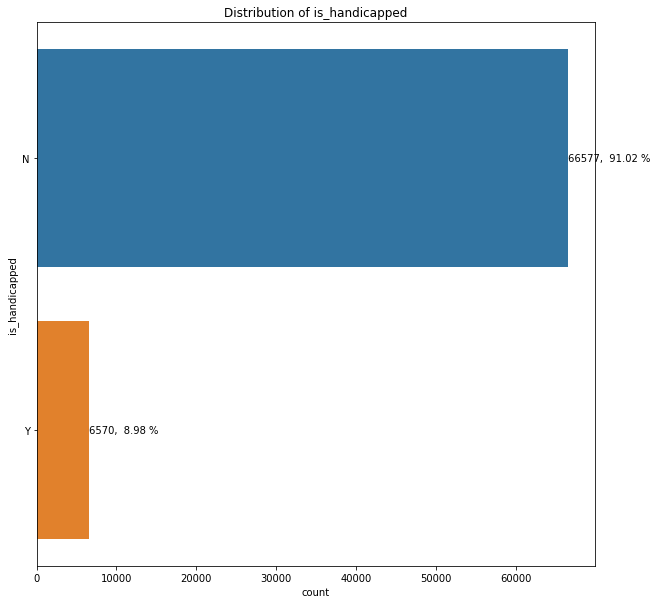

In [25]:
## Selecting categorical
cat_cols = train.dtypes=='object'
cat_cols = list(cat_cols[cat_cols].index)
## Plotting the barplot
for col in cat_cols:
    utils.barplot(train[col], col)

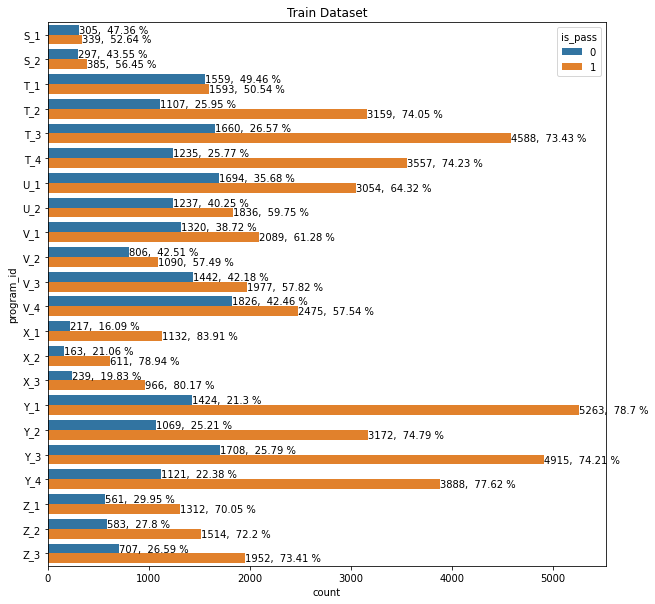

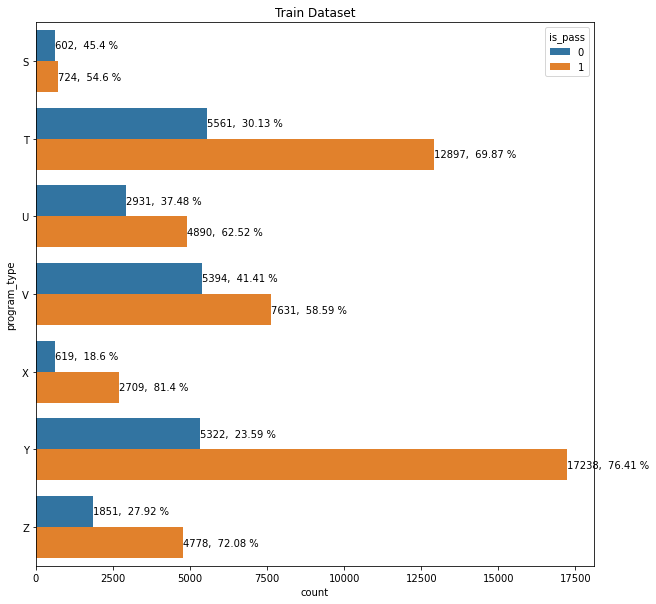

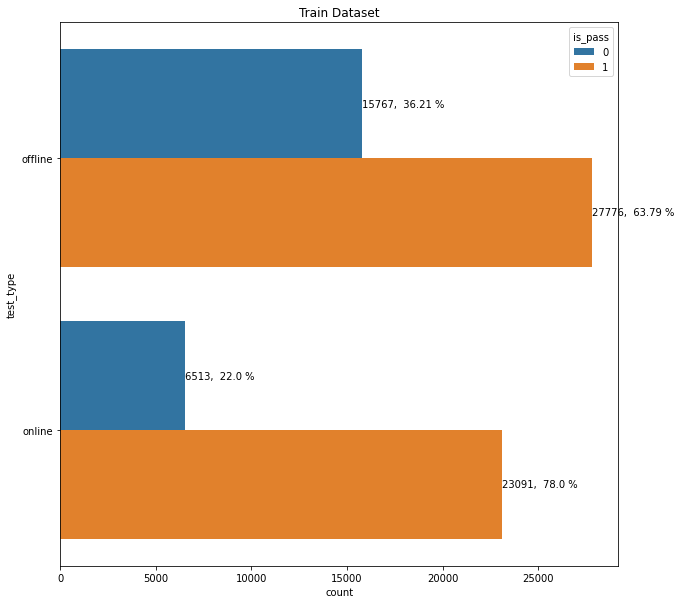

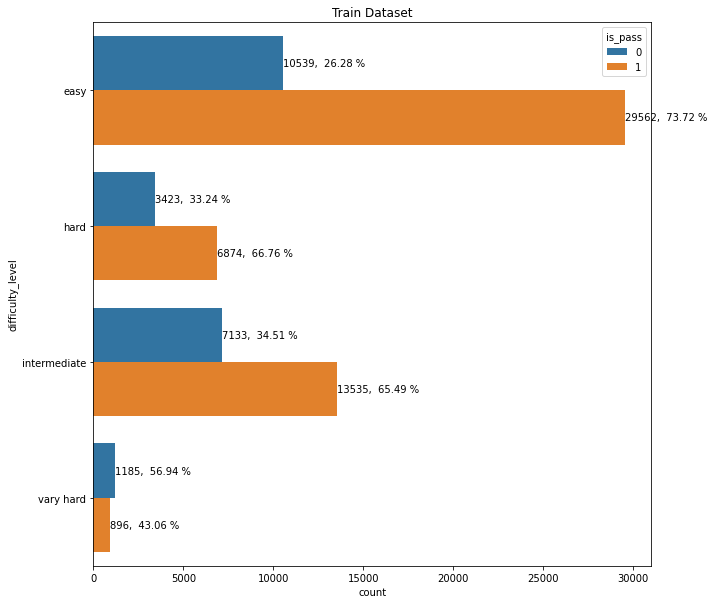

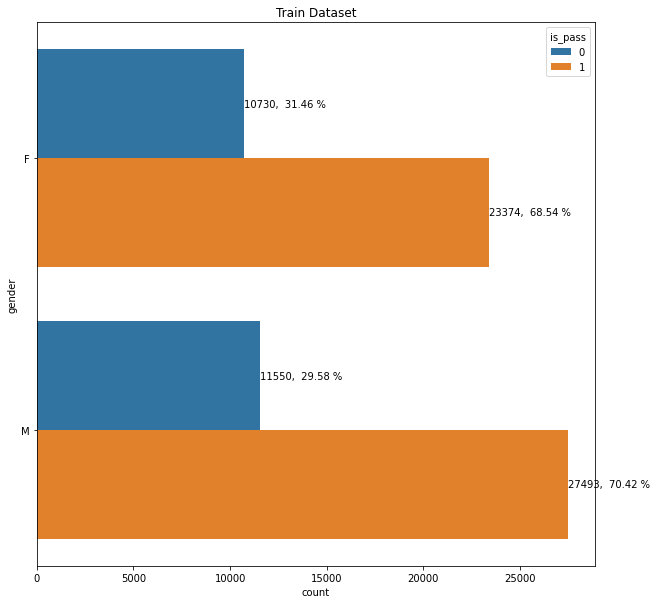

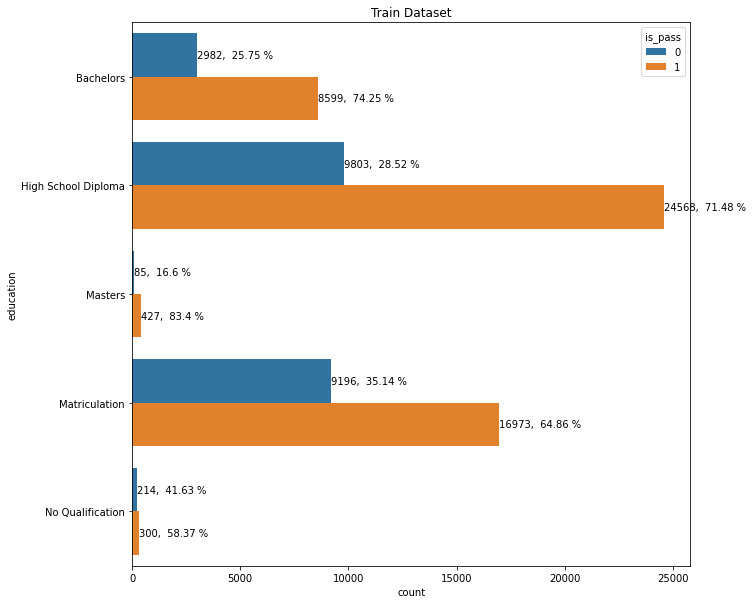

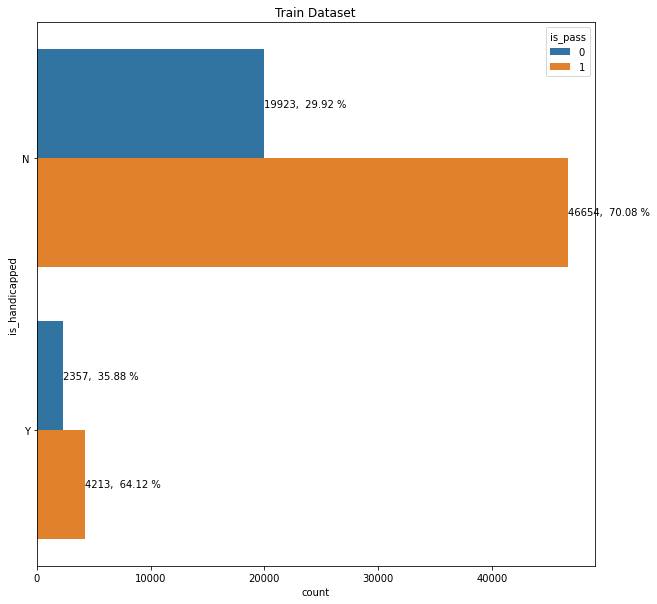

In [26]:
### Categorical data distribution wrt target variable
target = 'is_pass'
for col in cat_cols:
    utils.barplot_hue(train[col], train[target], 'Train Dataset')

In [27]:
##### Numerical Columns
num_cols = train.dtypes != 'object'
num_cols = list(num_cols[num_cols].index)
num_cols.remove(target) ## Removing the target variable from the list if it is numerical

Distribution of program_duration of train dataset


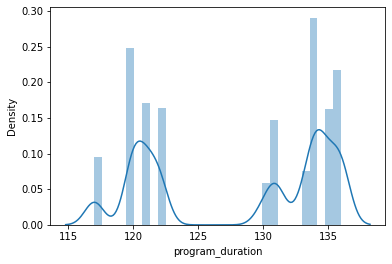

Distribution of test_id of train dataset


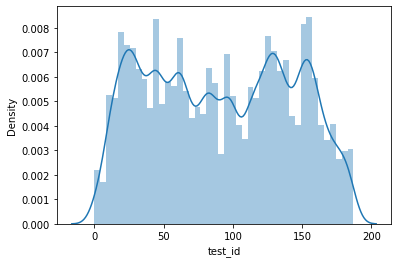

Distribution of trainee_id of train dataset


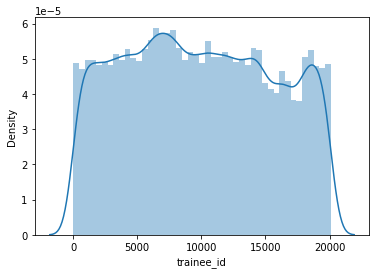

Distribution of city_tier of train dataset


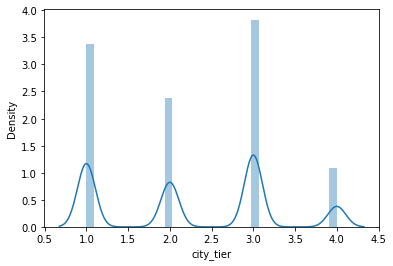

Distribution of age of train dataset


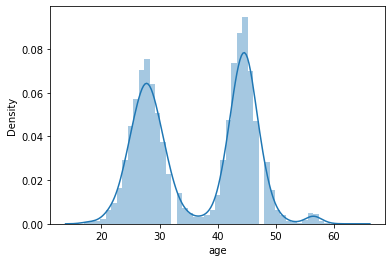

Distribution of total_programs_enrolled of train dataset


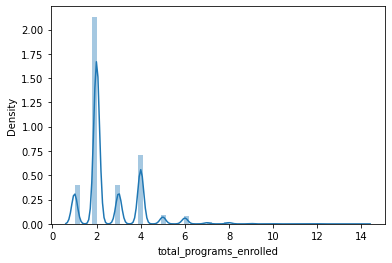

Distribution of trainee_engagement_rating of train dataset


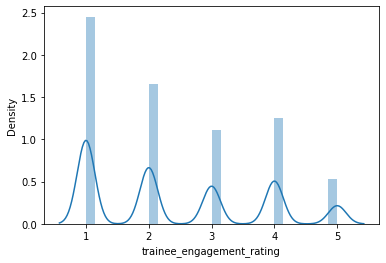

In [29]:
for col in num_cols:
    print("Distribution of " + col +" of train dataset")
    sns.distplot(train[col], kde=True)
    plt.show()

In [ ]:
for col in num_cols:
    utils.barplot_hue(train[col], train[target], col)